In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
X = []
# X.append(fw_info_1[2:])
# X.append(fw_info_2[2:])
X.append(fw_info_3[2:])
X.append(fw_info_4[2:])
X.append(soc_info_1[2:])
X.append(soc_info_2[2:])
X.append(soc_info_3[2:])
# X.append(soc_info_4[2:])
X.append(soc_info_5[2:])
# X.append(soc_info_6[2:])
X.append(ppi_info_1[2:])
X.append(ppi_info_2[2:])
X.append(ppi_info_3[2:])
X.append(ppi_info_4[2:])
X.append(cit_info_1[2:])
X.append(cit_info_2[2:])
# X.append(cit_info_3[2:])
# X.append(cit_info_4[2:])
X.append(rd_info_1[2:])
X.append(rd_info_2[2:])
X.append(qa_info_1[2:])
X.append(qa_info_2[2:])
# labels = [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6]

NameError: name 'fw_info_3' is not defined

In [163]:
data = scale(X)
n_samples, n_features = data.shape
n_cluster = len(np.unique(labels))

In [15]:
labels = [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]

In [33]:
processed_data = np.array([[ 2.625031  ,  2.05596506,  2.64133173, -0.68475736, -0.90535925],
       [ 1.93576588,  2.87767896,  2.50758522, -0.64923867, -0.69917168],
       [ 1.23426139,  0.72387196,  0.28519382, -0.50538388, -0.37426097],
       [-0.45302402, -0.29001889, -0.39966624, -0.19033778, -0.10307284],
       [-0.47562991, -0.45084044, -0.55025347,  0.31090141,  0.72379356],
       [-0.35278871, -0.10132745, -0.35159624,  0.13135904,  0.09642606],
       [-0.70922316, -0.58607211, -0.47640833, -0.35361255, -0.60654892],
       [-0.65913293, -0.28278404, -0.26643147,  0.10076475, -0.55505852],
       [-0.40711306, -0.56876295, -0.50725285, -0.52212673, -0.36250905],
       [-0.51934214, -0.41739865, -0.4756703 , -0.18788403, -0.00911519],
       [-0.39720502, -0.43657943, -0.53758519, -0.26235014,  0.58652083],
       [ 0.55016894, -0.11689392, -0.23255896, -0.50442121, -0.36535866],
       [-0.46586574, -0.37789886, -0.02389889, -0.71951084, -1.01732008],
       [-0.52088691, -0.58446122, -0.31386881, -0.71846865, -1.01644117],
       [-0.66209229, -0.62934491, -0.63164961,  1.48354301,  2.16210062],
       [-0.72292331, -0.81513312, -0.6672704 ,  3.27152364,  2.44537527]])

In [10]:
processed_data[:, :3]

array([[ 2.625031  ,  2.05596506,  2.64133173],
       [ 1.93576588,  2.87767896,  2.50758522],
       [ 1.23426139,  0.72387196,  0.28519382],
       [-0.45302402, -0.29001889, -0.39966624],
       [-0.47562991, -0.45084044, -0.55025347],
       [-0.35278871, -0.10132745, -0.35159624],
       [-0.70922316, -0.58607211, -0.47640833],
       [-0.65913293, -0.28278404, -0.26643147],
       [-0.40711306, -0.56876295, -0.50725285],
       [-0.51934214, -0.41739865, -0.4756703 ],
       [-0.39720502, -0.43657943, -0.53758519],
       [ 0.55016894, -0.11689392, -0.23255896],
       [-0.46586574, -0.37789886, -0.02389889],
       [-0.52088691, -0.58446122, -0.31386881],
       [-0.66209229, -0.62934491, -0.63164961],
       [-0.72292331, -0.81513312, -0.6672704 ]])

In [34]:
def classify_networks(data, n_cluster, repeat=500):
    homo = 0
    compl = 0
    v_measure = 0
    for i in range(repeat):
        estimator = KMeans(init='random', n_clusters=n_cluster, n_init=1)
        estimator.fit(data)
        h = metrics.homogeneity_score(labels, estimator.labels_)
        c = metrics.completeness_score(labels, estimator.labels_)
        v = metrics.v_measure_score(labels, estimator.labels_)
        if h > homo:
            homo = h
        if c > compl:
            compl = c
        if v > v_measure:
            v_measure = v
            model = estimator
    return model, homo, compl, v_measure

In [946]:
classify_networks(data[:, 2:7], n_cluster=6, repeat=1000)

(KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
        n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
        tol=0.0001, verbose=0),
 0.8097589881390796,
 0.8787160271903635,
 0.8263862985601094)

In [936]:
classify_networks(data[:, 2:5], n_cluster=6, repeat=1000)

(KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
        n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
        tol=0.0001, verbose=0),
 0.7311278124459133,
 0.7664216855012236,
 0.7451912005462776)

In [930]:
model_1.labels_

array([1, 1, 4, 5, 3, 3, 5, 5, 5, 5, 3, 3, 2, 2, 0, 0], dtype=int32)

In [931]:
model_2.labels_

array([4, 4, 1, 2, 2, 2, 5, 5, 2, 2, 2, 1, 3, 3, 0, 0], dtype=int32)

In [17]:
labels

[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]

In [35]:
# use k, C, E, I, O
reduced_data = PCA(n_components=2).fit_transform(processed_data)
kmeans,_,_,_ = classify_networks(reduced_data, n_cluster=6, repeat=1000)
print(metrics.homogeneity_score(labels, kmeans.labels_))
print(metrics.completeness_score(labels, kmeans.labels_))
print(metrics.v_measure_score(labels, kmeans.labels_))

0.8786311756931664
0.9154706405998702
0.8966726837441217


In [28]:
# pca = PCA(n_components=5)
# pca.fit(processed_data)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

In [56]:
# use k, C, E
reduced_data_2 = PCA(n_components=2).fit_transform(processed_data[:, :3])
kmeans_2,_,_,_ = classify_networks(reduced_data_2, n_cluster=6, repeat=1000)
print(metrics.homogeneity_score(labels, kmeans_2.labels_))
print(metrics.completeness_score(labels, kmeans_2.labels_))
print(metrics.v_measure_score(labels, kmeans_2.labels_))

0.6188721875540867
0.7280849265342195
0.6690510135719856


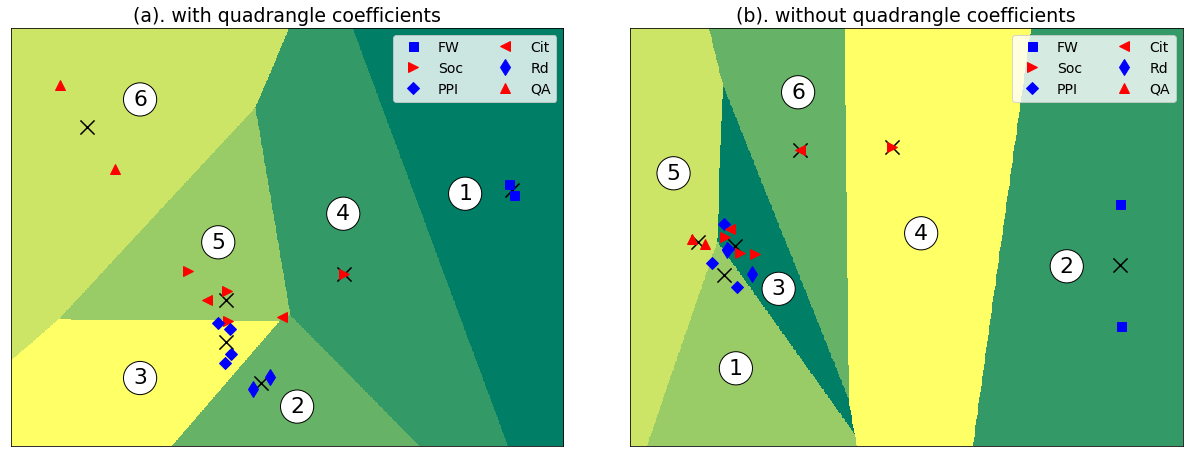

In [57]:
h = .01
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.8, reduced_data[:, 0].max() + 0.8
y_min, y_max = reduced_data[:, 1].min() - 0.8, reduced_data[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# bottom figure
x_min_2, x_max_2 = reduced_data_2[:, 0].min() - 0.8, reduced_data_2[:, 0].max() + 0.8
y_min_2, y_max_2 = reduced_data_2[:, 1].min() - 0.8, reduced_data_2[:, 1].max() + 0.8
xx_2, yy_2 = np.meshgrid(np.arange(x_min_2, x_max_2, h), np.arange(y_min_2, y_max_2, h))
# Obtain labels for each point in mesh. Use last trained model.
Z_2 = kmeans_2.predict(np.c_[xx_2.ravel(), yy_2.ravel()])
# Put the result into a color plot
Z_2 = Z_2.reshape(xx_2.shape)


onepic, axes = plt.subplots(1,2,figsize=(21,7.7))
plt.subplots_adjust(hspace=0.12, wspace=.12) 
axes[0].imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='summer',
           aspect='auto', origin='lower')
axes[0].plot(tag_fw[:, 0], tag_fw[:, 1], 's', markersize=9, color="blue", label="FW")
axes[0].plot(tag_soc[:, 0], tag_soc[:, 1], '>', markersize=10, color="red", label="Soc")
axes[0].plot(tag_ppi[:, 0], tag_ppi[:, 1], 'D', markersize=9, color="blue", label="PPI")
axes[0].plot(tag_cit[:, 0], tag_cit[:, 1], '<', markersize=10, color="red", label="Cit")
axes[0].plot(tag_rd[:, 0], tag_rd[:, 1], 'd', markersize=11, color="blue", label="Rd")
axes[0].plot(tag_qa[:, 0], tag_qa[:, 1], '^', markersize=10, color="red", label="QA")

axes[0].legend(prop={'size': 14}, ncol=2)
centroids = kmeans.cluster_centers_
# area labels
axes[0].text(-2, 2.5, "6", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(1.3, 0.9, "4", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-0.73, 0.50, "5", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(3.28, 1.18, "1", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-2, -1.4, "3", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(0.55, -1.8, "2", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='k')
axes[0].set_title('(a). with quadrangle coefficients', fontsize=19)
axes[0].set_xticks(())
axes[0].set_yticks(())

# bottom figure
axes[1].imshow(Z_2, interpolation='nearest',
           extent=(xx_2.min(), xx_2.max(), yy_2.min(), yy_2.max()),
           cmap='summer',
           aspect='auto', origin='lower')
axes[1].plot(tag_fw_2[:, 0], tag_fw_2[:, 1], 's', markersize=9, color="blue", label="FW")
axes[1].plot(tag_soc_2[:, 0], tag_soc_2[:, 1], '>', markersize=10, color="red", label="Soc")
axes[1].plot(tag_ppi_2[:, 0], tag_ppi_2[:, 1], 'D', markersize=9, color="blue", label="PPI")
axes[1].plot(tag_cit_2[:, 0], tag_cit_2[:, 1], '<', markersize=10, color="red", label="Cit")
axes[1].plot(tag_rd_2[:, 0], tag_rd_2[:, 1], 'd', markersize=11, color="blue", label="Rd")
axes[1].plot(tag_qa_2[:, 0], tag_qa_2[:, 1], '^', markersize=10, color="red", label="QA")

axes[1].legend(prop={'size': 14}, ncol=2)
centroids_2 = kmeans_2.cluster_centers_
axes[1].text(3.45, -0.22, "2", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-1.6, 0.4, "5", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-0.25, -0.37, "3", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-0.8, -0.9, "1", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-0, 0.94, "6", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(1.58, 0, "4", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].scatter(centroids_2[:, 0], centroids_2[:, 1], marker='x', s=200, color='k')
axes[1].set_title('(b). without quadrangle coefficients', fontsize=19)
axes[1].set_xticks(())
axes[1].set_yticks(())

plt.savefig('network_classification.pdf')

In [983]:
kmeans.labels_ + 1

array([1, 1, 4, 5, 5, 5, 3, 3, 3, 3, 5, 5, 2, 2, 6, 6], dtype=int32)

In [984]:
kmeans_2.labels_ + 1

array([2, 2, 4, 3, 3, 3, 1, 1, 3, 3, 3, 6, 3, 3, 5, 5], dtype=int32)

In [37]:
tag_fw = reduced_data[:2]
tag_soc = reduced_data[2:6]
tag_ppi = reduced_data[6:10]
tag_cit = reduced_data[10:12]
tag_rd = reduced_data[12:14]
tag_qa = reduced_data[14:]

In [38]:
tag_fw_2 = reduced_data_2[:2]
tag_soc_2 = reduced_data_2[2:6]
tag_ppi_2 = reduced_data_2[6:10]
tag_cit_2 = reduced_data_2[10:12]
tag_rd_2 = reduced_data_2[12:14]
tag_qa_2 = reduced_data_2[14:]

In [2]:
FW_Chesa = nx.read_edgelist("datasets/FW-Chesa", create_using=nx.Graph)
FW_Baywet = nx.read_edgelist("datasets/FW-Baywet", create_using=nx.Graph, data = (('weight', float),))
FW_Baydry = nx.read_edgelist("datasets/FW-Baydry", create_using=nx.Graph, data = (('weight', float),))
FW_LittleRock = nx.read_edgelist("datasets/FW-LittleRock", create_using=nx.Graph)

Soc_EmailEu = nx.read_edgelist("datasets/Soc-EmailEu", create_using=nx.Graph, data=(('sec', int),))
Soc_Msg = nx.read_edgelist("datasets/CollegeMsg", create_using=nx.Graph, data=(('sec', int),))
Soc_Alpha = nx.read_edgelist("datasets/BTC-Alpha", delimiter = ',', create_using=nx.Graph, data=(('weight', int),('sec', int),))
Soc_OTC = nx.read_edgelist("datasets/BTC-OTC", delimiter = ',', create_using=nx.Graph, data=(('weight', int),('sec', float),))
#Soc_Digg = nx.read_edgelist("datasets/Digg-friends", create_using=nx.Graph, data=(('weight', int), ('sec', int),))#
Soc_FB = nx.read_edgelist("datasets/Soc-FB", delimiter = ',', create_using=nx.Graph)
Soc_Twitch = nx.read_edgelist("datasets/Soc-Twitch-Fr", delimiter = ',', create_using=nx.Graph)

PPI_Stelzl = nx.read_edgelist("datasets/HP-Stelzl", create_using=nx.Graph)
PPI_Figeys = nx.read_edgelist("datasets/HP-Figeys", create_using=nx.Graph)
PPI_Vidal = nx.read_edgelist("datasets/HP-Vidal", create_using=nx.Graph)
PPI_IntAct = nx.read_edgelist("datasets/HP-IntAct", create_using=nx.Graph)

Cit_DBLP = nx.read_edgelist("datasets/Cit-DBLP", create_using=nx.Graph, data=(('weight', int),('sec', int),))
Cit_Cora = nx.read_edgelist("datasets/Cit-Cora", create_using=nx.Graph)
Cit_HepPh = nx.read_edgelist("datasets/Cit-HepPh", create_using=nx.Graph)
Cit_HepTh = nx.read_edgelist("datasets/Cit-HepTh", create_using=nx.Graph)

#FLT_USAirpot = nx.read_edgelist("datasets/FLT-USAirport", create_using=nx.Graph, data=(('weight', int),))
#FLT_Opsahl = nx.read_edgelist("datasets/FLT-Opsahl", create_using=nx.Graph)
Road_NY = nx.read_edgelist("datasets/Road-NY", create_using=nx.Graph)
Road_Bay = nx.read_edgelist("datasets/Road-BayArea", create_using=nx.Graph)
#Road_Col = nx.read_edgelist("datasets/Road-Colorado", create_using=nx.Graph)

QA_Math = nx.read_edgelist("datasets/QA-MathOvfl-a2q", create_using=nx.Graph, data=(('sec', int),))
QA_Ubuntu = nx.read_edgelist("datasets/QA-AskUbuntu-a2q", create_using=nx.Graph, data=(('sec', int),))
#QA_Superuser = nx.read_edgelist("datasets/QA-Superuser-a2q", create_using=nx.Graph, data=(('sec', int),))

In [3]:
cit_info_1 = nx.get_network_info(Cit_DBLP, filename="network_info/Cit_DBLP.txt")
cit_info_2 = nx.get_network_info(Cit_Cora, filename="network_info/Cit_Cora.txt")
cit_info_3 = nx.get_network_info(Cit_HepPh, filename="network_info/Cit_HepPh.txt")
cit_info_4 = nx.get_network_info(Cit_HepTh, filename="network_info/Cit_HepTh.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'network_info/Cit_DBLP.txt'

In [ ]:
# nx.get_network_info(FLT_USAirpot, filename="network_info/FLT_USAirpot.txt")
# nx.get_network_info(FLT_Opsahl, filename="network_info/FLT_Opsahl.txt")
rd_info_1 = nx.get_network_info(Road_NY, filename="network_info/Road_NY.txt")
rd_info_2 = nx.get_network_info(Road_Bay, filename="network_info/Road_Bay.txt")
# nx.get_network_info(Road_Col, filename="network_info/Road_Col.txt")

In [ ]:
fw_info_1 = nx.get_network_info(FW_Chesa, filename="network_info/FW_Chesa.txt")
fw_info_2 = nx.get_network_info(FW_Baywet, filename="network_info/FW_Baywet.txt")
fw_info_3 = nx.get_network_info(FW_Baydry, filename="network_info/FW_Baydry.txt")
fw_info_4 = nx.get_network_info(FW_LittleRock, filename="network_info/FW_LittleRock.txt")

In [ ]:
soc_info_1 = nx.get_network_info(Soc_EmailEu, filename="network_info/Soc_EmailEu.txt")
soc_info_2 = nx.get_network_info(Soc_Msg, filename="network_info/Soc_Msg.txt")
soc_info_3 = nx.get_network_info(Soc_Alpha, filename="network_info/Soc_Alpha.txt")
soc_info_4 = nx.get_network_info(Soc_OTC, filename="network_info/Soc_OTC.txt")
soc_info_5 = nx.get_network_info(Soc_Twitch, filename="network_info/Soc_Twitch.txt")
soc_info_6 = nx.get_network_info(Soc_FB, filename="network_info/Soc_FB.txt")

# nx.get_network_info(Soc_Digg, filename="network_info/Soc_Digg.txt")

In [ ]:
ppi_info_1 = nx.get_network_info(PPI_Stelzl, filename="network_info/PPI_Stelzl.txt")
ppi_info_2 = nx.get_network_info(PPI_Figeys, filename="network_info/PPI_Figeys.txt")
ppi_info_3 = nx.get_network_info(PPI_Vidal, filename="network_info/PPI_Vidal.txt")
ppi_info_4 = nx.get_network_info(PPI_IntAct, filename="network_info/PPI_IntAct.txt")

In [ ]:
qa_info_1 = nx.get_network_info(QA_Math, filename="network_info/QA_Math.txt")
# nx.get_network_info(QA_Superuser, filename="network_info/QA_Superuser.txt")
qa_info_2 = nx.get_network_info(QA_Ubuntu, filename="network_info/QA_Ubuntu.txt")